## Dynamic Programming

The key idea of DP, and of reinforcement learning generally, is the use of value functions to orgamize and stucture the search for good policies. In this chapter we see how DP can be used to compute the value functions. We can easily obtain optimal policies once we have found the optimal value functions, $v_*$ or $q_*$, which satisfy the Bellman optimality equations

$\large v_*(s) = \underset {a}{max} \mathbb{E} \big[R_{t+1} + \gamma \space v_*(S_{t+1}) \space | \space S_t = s,A_t=s\big]$
</p>
$\large = \underset {a}{max} \sum_{s',r}p(s',r \space | \space s,a)\Big[r + \gamma \space v_*(s') \Big] \rightarrow (4.1)$

$\large q_*(s,a) = \mathbb{E} \Big[ R_{t+1} + \gamma \underset {a}{max}q_*(S_{t+1},a') \space | \space S_t=2,A_t=a \Big]$

</p>
$\large = \sum_{s',r}p(s',r \space | \space s,a) \Big[r+\gamma \underset{a}{max}q_*(s',a')\Big] \rightarrow (4.2)$

for all $s \in S, a \in A(s)$ and $s' \in S^+$. DP algorithms are obtained by tuing Bellman equations such as 4.1 and 4.2 in to assignments, that is, into update rules for improving approximations of the desired value functions. 

## Policy Evaluation (Prediction)

First we consider how to compute the state-value function $v_\pi$ for an arbitrary policy $\pi$. This is called **policy evaluation** in the DP liteature.

$\large v_\pi(s) \doteq \mathbb{E}_\pi[G_t \space | \space S_t=s]$
</p>
$\large = \mathbb{E}_\pi[R_{t+1} + \gamma G_{t+1} \space | \space S_t=s]$
</p>
$\large = \mathbb{E}_\pi[R_{t+1} + \gamma v_\pi(S_{t+1}) \space | \space S_t=s] \rightarrow (4.3)$
</p>
$\large = \sum_{a}\pi(a|s)\sum_{s',r}p(s',r|s,a)\Big[ r + \gamma v_\pi(s')\Big] \rightarrow (4.4)$

Where $\pi(a|s)$ is the probability of taking action $a$ in state $s$ under policy $\pi$ and the expectations are subscripted by $\pi$ to indicate that they are conditional on $\pi$ being followed. The existence and uniqueness of $v_\pi$ are guaranteed as lon as either $\gamma < 1$ or eventual termination is guaranteed from all states under the policy $\pi$.

If the environment's dynamics are completely known, then 4.4 is a system of $|S|$ simultaneous linear equations in $|S|$ unknowns.

Consider a sequence of approximate value functions $v_0,v_1,v_2,....$ each mapping $S^+$ to $\mathbb{R}$ (the real numbers). The initial approximation, $v_0$, is chosen arbitrarily (except that the terminal state, if any, must give value 0) and each successive approximation is obtained by using the Bellman equation for $v_\pi$ (4.4) as an update rule.

$\Large v_{k+1}(s) \doteq \mathbb{E}_\pi[R_{t+1} + \gamma v_k(S_{t+1} \space | \space S_t=s]$
</p>
$\large = \sum_a \pi(a|s) \sum_{s',r} p(s',r \space | \space s,a) \Big[ r + \gamma v_k(s') \Big]$

for all $s \in S$. Clearly, $v_k = v_\pi$ is a fixed point for this update rule because the Bellman equation for $v_\pi$ assures us of equality in this case. Indeed, the sequence $\{v_k\}$ can be shown in general to converge to $v_\pi$ as $k \rightarrow \infty$ under the same conditions that guarantee the existence of $v_\pi$. This algorith is called **iterative policy evaluation.**

**Exercise 4.1**
</p>
The nonterminal states are $S = \{1,2,....,14\}$. There are four actions possible in each state, $A = \{up, down, ight, left \}$, which dtermininistically caus the corresponding state transitions, except that action that would take the agent off the grid in fact leave the state unchanged. Thus, for instance, $p(6,-1 \space | \space 5,right) = 1, \space p(7,-1 \space | \space 7,right) =1$ and $p(10,r \space | \space 5, right) = 0$ for all $r \in R$. This is an undiscounted, episodic task. The reward is $-1$ on all transitions untill the terminal state is reached. The terninal state is shaded in the figure. The expected reward function is thus $r(s,a,s') = -1$ for all states $s,s'$ and actions $a$. Suppose the agent follows the equiprobable random policy, compute by iterative policy evaluation.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.table import Table

In [2]:
def DrawTable(mat):
    fig, ax = plt.subplots()
    ax.set_axis_off()
    tb = Table(ax, bbox=[0, 0, 1, 1],)

    nrows, ncols = mat.shape
    width, height = 1.0 / ncols, 1.0 / nrows

    # Add cells
    for (i,j), val in np.ndenumerate(mat):
        if (i == 0 and j == 0) or ( i == 3 and j == 3):
            color = 'g'
            val = 'Goal'
        else:
            color = 'w'

        tb.add_cell(i, j, width, height, text=val,loc='center', facecolor=color)

    ax.add_table(tb)
    plt.show()

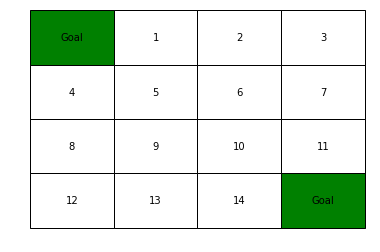

In [3]:
mat = np.array(range(16)).reshape(4,4)
DrawTable(mat)

In the above figure, the cells with green color are the terminal state for each episodic tasks

## Solution:

In [4]:
WORLD_SIZE = 4

# left, up, right, down
Actions =[np.array([-1,0]),
         np.array([0,-1]),
         np.array([1,0]),
         np.array([0,1])]

Prob = 1/len(Actions)
Prob

0.25

In [5]:
def Step(state, action):
    state = np.array(state)
    next_state = (state + action).tolist()
    x, y = next_state
    if x < 0 or x >= WORLD_SIZE or y < 0 or y >= WORLD_SIZE:
        next_state = state
    
    reward = -1
    return next_state, reward

In [6]:
def IsTerminalStateReached(state):
    x,y=state
    return (x == 0 and y == 0) or (x == WORLD_SIZE-1 and y == WORLD_SIZE-1)
        

Value got converged on 16 iterations


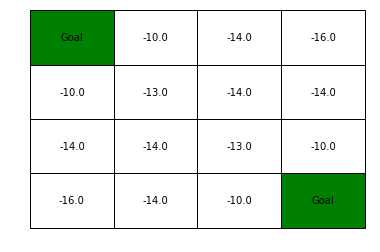

In [7]:
NewStateValues = np.zeros((WORLD_SIZE,WORLD_SIZE))
StateValues = NewStateValues.copy()
count = 0
while True:
    count +=1
    for i in range(WORLD_SIZE):
        for j in range(WORLD_SIZE):
            if IsTerminalStateReached([i,j]):
                continue
            value = 0
            for act in Actions:
                (next_x,next_y),reward = Step([i,j],act)
                value += Prob * (reward + NewStateValues[next_x,next_y])
            NewStateValues[i,j] = round(value) 
            #print(f'{i},{j} = {value}')
    #print(f'abs sum = {np.sum(np.abs(NewStateValues - StateValues))}')
    if np.sum(np.abs(NewStateValues - StateValues)) < 1e-4:
        StateValues = NewStateValues.copy()
        break
    StateValues = NewStateValues.copy()

print(f'Value got converged on {count} iterations')
#print(StateValues)
DrawTable(StateValues)       

## Iterative Policy Evaluation, for estimating $V \approx v_\pi$

**Algorighm**
>
Input $\pi$, the policy to be evaluated
Alogirhm parameter: a small threshold $\theta > 0$ determining accuracy of estimation
Initialize $\large V(s)$ for all $s \in \mathbf{S}^+$, arbitrarily except that $V(terminal) = 0$


$\large
\begin{align}
 Loop: {} \\
     & \Delta \leftarrow 0 \\
     & \text{Loop for each} \space s \in S: \\
         &&& v \leftarrow V(s) \\
         &&& V(s) \leftarrow \sum_a \pi(a|s) \space \sum_{s',r'}p(s',r|s,a)\Big[r +\gamma V(s') \Big] \\
         &&& \Delta \leftarrow max(\Delta,|v-V(s)|) \\
\end{align}
$
>
$\large \text{until} \Delta < \theta$

Below code is work in progress to implement the above logic. Not correct
 

In [29]:
States = np.array(range(16))
Rewards = -1
V_s = np.zeros(16)
#theta = np.random.random_sample()
theta = 1e-4
prob = 1/len(States)
gamma = 0.9

In [30]:
count = 0

while True:
    delta = np.random.random_sample();
    count +=1
    for i,s in enumerate(States):
        v = V_s
        if i == States[0]:
            i_dash = np.random.randint(0,10)
        V_s[i] = prob * (Rewards + gamma * V_s[i_dash] )
        delta = max(delta, np.abs(v.sum()-V_s.sum()))
    if delta < theta:
        break
print(f'theta = {theta}')
print(f'number of iterations {count}')
print(V_s)

theta = 0.0001
number of iterations 15736
[-0.06622517 -0.06622517 -0.06622517 -0.06622517 -0.06622517 -0.06622517
 -0.06622517 -0.06622517 -0.06622517 -0.06622517 -0.06622517 -0.06622517
 -0.06622517 -0.06622517 -0.06622517 -0.06622517]
